In [29]:
from openbb_terminal.sdk import openbb
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly
%matplotlib inline
plt.style.use('fivethirtyeight')
from datetime import datetime
import QuantLib as ql

In [21]:
correlation,historical = (
    openbb.stocks.ca.hcorr(['MORN','CG','PFG','TROW','UBS','RJF','BAM','IVZ'],
    candle_type = 'R',
    start_date = '2018-11-01'
    )
)
correlation


NaN values found in: MORN, CG, PFG, TROW, UBS, RJF, BAM, IVZ.  Backfilling data

,MORN,CG,PFG,TROW,UBS,RJF,BAM,IVZ
MORN,1.000000,0.494387,0.401029,0.534273,0.418418,0.422776,0.096216,0.424912
CG,0.494387,1.000000,0.602922,0.645038,0.601959,0.575663,0.083802,0.599248
PFG,0.401029,0.602922,1.000000,0.658636,0.704538,0.770178,0.097611,0.722726
TROW,0.534273,0.645038,0.658636,1.000000,0.636156,0.683325,0.084028,0.732461
UBS,0.418418,0.601959,0.704538,0.636156,1.000000,0.684431,0.075714,0.676151
RJF,0.422776,0.575663,0.770178,0.683325,0.684431,1.000000,0.090968,0.721530
BAM,0.096216,0.083802,0.097611,0.084028,0.075714,0.090968,1.000000,0.067843
IVZ,0.424912,0.599248,0.722726,0.732461,0.676151,0.721530,0.067843,1.000000


In [70]:
start = "2022-01-01"
end = "2023-06-02"
symbols = ['MORN','IVZ','RJF']
tickers = openbb.stocks.ca.hist(symbols,start, end)

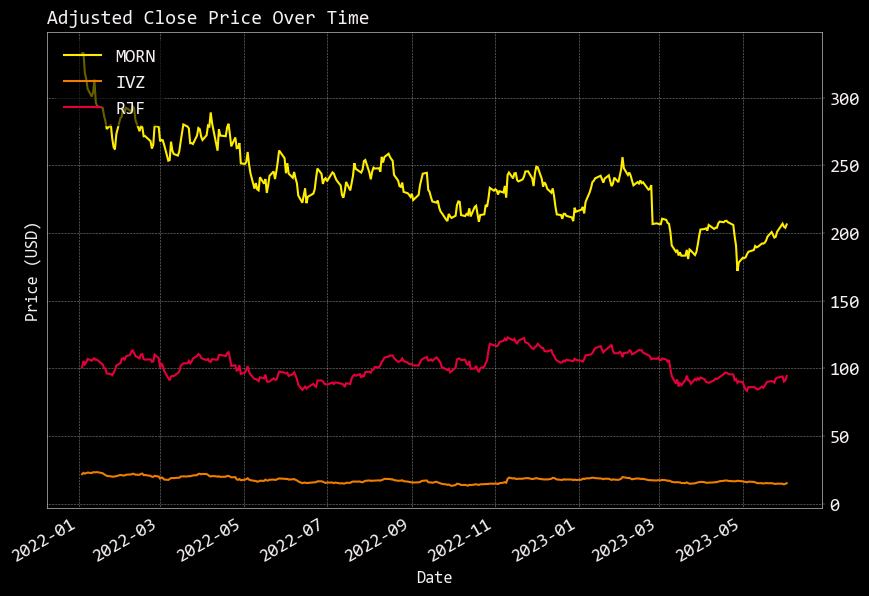

In [71]:
tickers.plot(figsize=(10,7), grid=True)
plt.title('Adjusted Close Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(tickers, loc='upper left')
plt.show()

In [72]:
cash_flow = openbb.stocks.ca.cashflow(symbols, timeframe = "2022", quarter = True)

print(cash_flow)

Other available quarterly timeframes are: 31-Mar-2022, 30-Jun-2022, 30-Sep-2022, 31-Dec-2022, 31-Mar-2023

                                       31-Mar-2023                   
                                              MORN       IVZ      RJF
Item                                                                 
Net Income before Extraordinaries           (7.6M)       NaN      NaN
Net Income Growth                         -330.30%       NaN      NaN
Depreciation, Depletion & Amortization       44.8M       NaN      NaN
Depreciation and Depletion                   27.3M       NaN      NaN
Amortization of Intangible Assets            17.5M       NaN      NaN
Deferred Taxes & Investment Tax Credit          2M       NaN      NaN
Deferred Taxes                                  2M       NaN      NaN
Investment Tax Credit                            -       NaN      NaN
Other Funds                                (37.8M)       NaN      NaN
Funds from Operations                         1.4M    269.8M     510M
Extraordinaries                                  -       NaN      NaN
Changes in Working C

In [74]:
income = openbb.stocks.ca.income(symbols, timeframe = "2022", quarter = True)

print(income)

Other available quarterly timeframes are: 31-Mar-2022, 30-Jun-2022, 30-Sep-2022, 31-Dec-2022, 31-Mar-2023

                                          31-Mar-2023                  
                                                 MORN      IVZ      RJF
Item                                                                   
Sales/Revenue                                  489.6M    1.48B    3.16B
Sales Growth                                    2.26%   -0.52%    3.47%
Cost of Goods Sold (COGS) incl. D&A            263.6M      NaN      NaN
COGS Growth                                     9.92%      NaN      NaN
COGS excluding D&A                             218.8M      NaN      NaN
Depreciation & Amortization Expense             44.8M    46.8M      41M
Depreciation                                    27.3M      NaN      NaN
Amortization of Intangibles                     17.5M      NaN      NaN
Gross Income                                     226M      NaN      NaN
Gross Income Growth                            -5.44%      NaN      NaN
Gross Profit Margin                            46.16%      NaN  

In [4]:
df = pd.read_csv("Morningstar EPS.csv")

df.head()

,Date,EPS
0,2023-03-31,-0.18
1,2022-12-31,0.09
2,2022-09-30,-0.21
3,2022-06-30,0.70
4,2022-03-31,1.06


In [6]:
df = df.rename(columns={'Date': 'ds', 'EPS': 'y'})

df.head()

,ds,y
0,2023-03-31,-0.18
1,2022-12-31,0.09
2,2022-09-30,-0.21
3,2022-06-30,0.70
4,2022-03-31,1.06


In [12]:
my_model = Prophet(interval_width=0.95)

my_model.fit(df)

future_dates = my_model.make_future_dataframe(periods=4, freq= 'Q', include_history= True)
future_dates.tail()

06:52:12 - cmdstanpy - INFO - Chain [1] start processing
06:52:13 - cmdstanpy - INFO - Chain [1] done processing


,ds
56,2023-03-31
57,2023-06-30
58,2023-09-30
59,2023-12-31
60,2024-03-31


In [16]:
forecast = my_model.predict(future_dates)
forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper',]]

forecast_df['Load_Date'] = datetime.now()

forecast_df.tail()

/var/folders/7n/qqbwqb3s2r147wkkm33_p6sw0000gn/T/ipykernel_42709/3842074227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_df['Load_Date'] = datetime.now()


,ds,yhat,yhat_lower,yhat_upper,Load_Date
56,2023-03-31,0.776020,0.118536,1.433577,2023-06-03 06:55:58.974269
57,2023-06-30,0.868615,0.193428,1.492529,2023-06-03 06:55:58.974269
58,2023-09-30,0.898620,0.208739,1.575153,2023-06-03 06:55:58.974269
59,2023-12-31,0.762445,0.109680,1.411091,2023-06-03 06:55:58.974269
60,2024-03-31,0.977826,0.324057,1.634555,2023-06-03 06:55:58.974269


In [ ]:
def write_to_snowflake(df, table_name, write_mode = 'append'):  
    spark.conf.set("spark.sql.execution.arrow.enabled", "true") 
    
    sp_df_update = spark.createDataFrame(df) 

    options = dict(sfUrl="https://ws67899.east-us-2.azure.snowflakecomputing.com",
                   sfUser=user, 
                   sfPassword=password, 
                   usestagingtable="off", 
                   sfDatabase="SANDBOX", 
                   sfSchema="MEDIA", 
                   sfWarehouse="DATALOADUNLOAD_WH",) 
    sp_df_update.write.format("snowflake").options(**options).option("dbtable", table_name).mode(write_mode).save()

In [25]:
morn_chain = openbb.stocks.options.chains(symbol = 'MORN')
pd.set_option('display.max_rows',None)

morn_chain.head(75)

,expirygroup,expiryDate,c_Last,c_Change,c_Bid,c_Ask,c_Volume,c_Openinterest,strike,p_Last,p_Change,p_Bid,p_Ask,p_Volume,p_Openinterest
1,"June 16, 2023",Jun 16,0.00,0.0,108.00,112.70,0,0,95.0,0.00,0.0,0.00,4.80,0,0
2,"June 16, 2023",Jun 16,0.00,0.0,103.00,107.50,0,0,100.0,0.00,0.0,0.00,4.80,0,0
3,"June 16, 2023",Jun 16,0.00,0.0,98.20,102.70,0,0,105.0,0.00,0.0,0.00,4.80,0,0
4,"June 16, 2023",Jun 16,0.00,0.0,93.30,97.20,0,0,110.0,0.50,0.0,0.00,4.80,0,0
5,"June 16, 2023",Jun 16,0.00,0.0,88.00,92.80,0,0,115.0,0.00,0.0,0.00,4.80,0,0
6,"June 16, 2023",Jun 16,0.00,0.0,83.60,86.90,0,0,120.0,0.10,0.0,0.00,4.80,0,2
7,"June 16, 2023",Jun 16,0.00,0.0,78.00,83.00,0,0,125.0,0.00,0.0,0.00,4.80,0,0
8,"June 16, 2023",Jun 16,0.00,0.0,73.40,77.70,0,0,130.0,0.35,0.0,0.00,0.40,0,76
9,"June 16, 2023",Jun 16,0.00,0.0,68.30,72.40,0,0,135.0,0.00,0.0,0.00,4.80,0,0
10,"June 16, 2023",Jun 16,0.00,0.0,63.20,67.10,0,0,140.0,0.00,0.0,0.00,4.80,0,0


In [37]:
morn_chain = morn_chain[(morn_chain['strike'] == 220) & (morn_chain['expirygroup'] == 'July 21, 2023')]

morn_chain 

,expirygroup,expiryDate,c_Last,c_Change,c_Bid,c_Ask,c_Volume,c_Openinterest,strike,p_Last,p_Change,p_Bid,p_Ask,p_Volume,p_Openinterest
62,"July 21, 2023",Jul 21,0.0,0.0,1.9,3.5,0,0,220.0,0.0,0.0,15.8,18.6,0,0


In [31]:
# Define option data to load into the model
maturity_date = ql.Date(21,7,2023)
spot_price = 205.29
strike_price = 220
iv = .2636
dividend_rate = 0.0155
option_type = ql.Option.Call 

risk_free_rate = 0.001
day_count=ql.Actual365Fixed()
calendar = ql.NullCalendar()

calculation_date = ql.Date.todaysDate()
ql.Settings.instance().evaluationDate = calculation_date

payoff = ql.PlainVanillaPayoff(option_type, strike_price)
settlement = calculation_date 

am_exercise = ql.AmericanExercise(settlement, maturity_date)
american_option = ql.VanillaOption(payoff, am_exercise)

In [33]:
#Prep the Black_Scholes varibles for loading into BlackScholesMertonProcess

spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))

flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date,risk_free_rate,day_count))

divident_yield = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date,dividend_rate,day_count))

flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date,calendar,iv,day_count))

bsm_process = ql.BlackScholesMertonProcess(spot_handle,flat_ts,divident_yield,flat_vol_ts)


In [39]:
#Load Black Scholes process into the pricing engine to produce an expected value of the option premium 
steps = 200
binomial_engine = ql.BinomialVanillaEngine(bsm_process,"crr",steps)
american_option.setPricingEngine(binomial_engine)

morn_ev = american_option.NPV()
morn_av = morn_chain['c_Ask']

print(morn_ev)
print(morn_av)

2.7433985102595786
62    3.5
Name: c_Ask, dtype: float64
